# Predicción de podios en la Formula 1

En este proyecto vamos a analizar datos de la fórmula 1 para poder predecir si un piloto tendrá podio, es decir si queda en entre los primeros 3 lugares.

El enfoque se dará de los periodos 2019 - 2021 y 2022 - 2024 ya que los reglamentos se han modificado y queremos analizar si estos tienen un impacto en las variables a estudiar

## ¿Cómo es una carrera de Fórmula 1?

Para familiarizarnos con las bases de datos y sus variables, veamos en qué consiste una carrera de fórmula 1

Cada año (*temporada*), se realizan distintas carreras al rededor del mundo (*rounds*) donde compiten equipos (*constructores*) con dos pilotos (*drivers*), con el objetivo de sumar los suficientes puntos para ganar los campenatos: constructores y pilotos

Cada carrera (*race*) se compone de:
* Tres prácticas libres (*fp*), donde los equipos y pilotos tienen una hora (cada día) para poner a prueba sus autos y tácticas encaminadas a la carrera

* *Qualifications* para determinar el la posición (*position*) en la 'parrilla' (*grid*). El mejor tiempo saldrá desde la posición 1

    * Una Qualy se divide en 3: Q
    * Q1 donde compiten todos los equipos y se eliminan 5 pilotos;
    * Q2 se eliminan 5 pilotos;
    * Q3 los 10 pilotos restantes compiten para obtener el mejor tiempo

El piloto que obtenga la posición 1 en la Q3 se lleva la "pole position"

* La carrera; se compite por los puntos (los primeros diez sólo obtienen) que suman tanto para el campeonanto de construcutores y de pilotos. Cada circuito tiene una distancia y eso determina el número de vueltas (*laps*) a realizar

Teniendo contexto del funcionamiento, pasemos a describir las variables

## Descripción de las variables

* Base `circuits`

    * `circuitId`: identificador único para cada circuito
    * `alt`: Altitud del circuito

* Base `drivers`

    * `driverId`: identificador único para cada piloto
    * `driverRef`: nombre más usado por cada piloto
    * `dob`: fecha de nacimiento
    * `nationality`: nacionalidad del piloto

* base `lap_times`
    * `lap`: número de lap en el circuito
    * `position`: historial de posición en la carrera
    * `time`: tiempo en completar la vuelta
    * `milliseconds`: tiempo en completar una vuelta. 60,000ms + segundos en ms

* base `pit_stops`
    * `stop`: número de pits realizados
    * `lap`: en que lap se dió el pit
    * `duration`: tiempo en completar el pit
    * `milliseconds`: tiempo en completar el pit en millisegundos

* base `qualifying`
    * `number`: número del piloto
    * `position`: posición resultante en la Q
    * `q1`, `q2`, `q3`: tiempo de la vuelta en las Q's

* Base `races`
    * `raceId`: Identificador único para cada carrera. Los posibles valores son de 900 a 1144
    * `year`: Año de la carrera
    * `circuitId`: identificador único de la carrera

* Base `results`:
    * `grid`: posición de cada piloto al inicio de la carrera (resultado de las Q's)
    * `position`: posición final del piloto en la carrera
    * `laps`: cantidad de vueltas que cada piloto realizó en una carrera
    * `time`: cantidad de tiempo en completar la carrera
    * `fastestlap`: número de vuelta donde cada piloto realizó su vuelta más rápida
    * `fastestLapTime`: tiempo de la vuelta más rápida del piloto
    * `fastestLapSpeed`: velocidad máxima a la que el piloto llegó en su vuelta más rápida
    * `statusId`: indica si finalizó o no la carrera y por qué


    ## Objetivo del análisis

    Con la información de las variables


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# Nuestra base principal será races y sólo filtramos las carreras a partir de 2019

races = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/races.csv', na_values='\\N', index_col='raceId')

races_2019_2024 = races[races['year'] >= 2019]
# vamos a analizar 128 carreras

In [57]:
races_2019_2024

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
raceId,,,,,,,,,,,,,,,,,
1010,2019,1,1,Australian Grand Prix,2019-03-17,05:10:00,http://en.wikipedia.org/wiki/2019_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,2019,2,3,Bahrain Grand Prix,2019-03-31,15:10:00,http://en.wikipedia.org/wiki/2019_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,2019,3,17,Chinese Grand Prix,2019-04-14,06:10:00,http://en.wikipedia.org/wiki/2019_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,2019,4,73,Azerbaijan Grand Prix,2019-04-28,12:10:00,http://en.wikipedia.org/wiki/2019_Azerbaijan_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,2019,5,4,Spanish Grand Prix,2019-05-12,13:10:00,http://en.wikipedia.org/wiki/2019_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,NaN,NaN
1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,NaN,NaN,2024-11-02,18:00:00,2024-11-02,14:00:00
1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,NaN,NaN


In [58]:
# qualifying datos
qualifying = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/qualifying.csv', na_values="\\N")

qualifying_2019_2024 = races_2019_2024.join(qualifying, on='raceId')

qualifying_2019_2024 = qualifying_2019_2024.drop(['circuitId', 'constructorId', 'number'], axis=1)

In [53]:
qualifying

,qualifyId,driverId,constructorId,number,position,q1,q2,q3
raceId,,,,,,,,
18,1,1,1,22,1,1:26.572,1:25.187,1:26.714
18,2,9,2,4,2,1:26.103,1:25.315,1:26.869
18,3,5,1,23,3,1:25.664,1:25.452,1:27.079
18,4,13,6,2,4,1:25.994,1:25.691,1:27.178
18,5,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...
1144,10547,848,3,23,16,1:23.821,NaN,NaN
1144,10548,855,15,24,17,1:23.880,NaN,NaN
1144,10549,1,131,44,18,1:23.887,NaN,NaN


In [59]:
# convertir columnas q1, q2, q3 a segundos
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    parts = time_str.split(':')
    if len(parts) == 1:
        return float(parts[0])
    elif len(parts) == 2:
        return int(parts[0]) * 60 + float(parts[1])
    else:
        return None


for col in ['q1', 'q2', 'q3']:
    qualifying_2019_2024[col] = qualifying_2019_2024[col].apply(time_to_seconds)

In [60]:
# unir las tabla race con qualifying para agregar columnas
qualifying_2019_2024 = races_2019_2024.merge(qualifying_2019_2024, on='raceId')

ValueError: 'raceId' is both an index level and a column label, which is ambiguous.

In [18]:
qualifying_2019_2024

,year_x,circuitId,year_y,qualifyId,driverId,position,q1,q2,q3
raceId,,,,,,,,,
1010,2019,1,2019,7960,1,1,82.043,81.014,80.486
1010,2019,1,2019,7961,822,2,82.367,81.193,80.598
1010,2019,1,2019,7962,20,3,82.885,81.912,81.190
1010,2019,1,2019,7963,830,4,82.876,81.678,81.320
1010,2019,1,2019,7964,844,5,82.017,81.739,81.442
...,...,...,...,...,...,...,...,...,...
1144,2024,24,2024,10547,848,16,83.821,NaN,NaN
1144,2024,24,2024,10548,855,17,83.880,NaN,NaN
1144,2024,24,2024,10549,1,18,83.887,NaN,NaN


In [49]:
# pit stops en las carreras
pits = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/pit_stops.csv', index_col='raceId')

pits_2019_2024 = races_2019_2024.join(pits, on='raceId')

pits_2019_2024  = pits_2019_2024 .drop(['time', 'year', 'circuitId'], axis=1)

In [50]:
pits_2019_2024

,driverId,stop,lap,duration,milliseconds
raceId,,,,,
1010,9.0,1.0,1.0,32.997,32997.0
1010,817.0,1.0,1.0,33.027,33027.0
1010,8.0,1.0,12.0,23.299,23299.0
1010,807.0,1.0,13.0,21.588,21588.0
1010,815.0,1.0,13.0,23.234,23234.0
...,...,...,...,...,...
1144,840.0,2.0,32.0,22.053,22053.0
1144,1.0,1.0,34.0,21.694,21694.0
1144,4.0,2.0,37.0,22.437,22437.0


In [33]:
# lap_times en cada carrera
lap_times = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/lap_times.csv', parse_dates=True)
lap_times_2019_2024 = lap_times[(lap_times['raceId'] >= 1010) & (lap_times['raceId'] <= 1144)]
lap_times_2019_2024 = lap_times_2019_2024.set_index(['raceId', 'driverId'])


In [34]:
lap_times_2019_2024

lap  position      time  milliseconds
raceId driverId                                       
1010   822         1         1  1:33.813         93813
       822         2         1  1:29.662         89662
       822         3         1  1:29.246         89246
       822         4         1  1:28.641         88641
       822         5         1  1:28.759         88759
...              ...       ...       ...           ...
1144   857        54        10  1:27.731         87731
       857        55        10  1:27.781         87781
       857        56        10  1:27.816         87816
       857        57        10  1:28.554         88554
       857        58        10  1:28.010         88010

[140202 rows x 4 columns]

In [35]:
lap_times_2019_2024.loc[(1010)]

,lap,position,time,milliseconds
driverId,,,,
822,1,1,1:33.813,93813
822,2,1,1:29.662,89662
822,3,1,1:29.246,89246
822,4,1,1:28.641,88641
822,5,1,1:28.759,88759
...,...,...,...,...
817,24,18,1:30.110,90110
817,25,18,1:30.501,90501
817,26,17,1:32.156,92156


In [36]:
# Resultados de cada carrera
results = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/results.csv', index_col='raceId').drop(['constructorId', 'number', 'positionText', 'rank'], axis=1)

results = races_2019_2024.join(results, on='raceId')

In [37]:
results

,year,circuitId,resultId,driverId,grid,position,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId
raceId,,,,,,,,,,,,,,,
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,5127325,57,1:25.580,223.075,1
1010,2019,1,24204,1,1,2,2,18.0,58,+20.886,5148211,57,1:26.057,221.839,1
1010,2019,1,24205,830,4,3,3,15.0,58,+22.520,5149845,57,1:26.256,221.327,1
1010,2019,1,24206,20,3,4,4,12.0,58,+57.109,5184434,16,1:27.954,217.054,1
1010,2019,1,24207,844,5,5,5,10.0,58,+58.203,5185528,58,1:26.926,219.621,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,2024,24,26760,825,14,16,16,0.0,57,\N,\N,57,1:25.637,222.002,11
1144,2024,24,26761,859,12,17,17,0.0,55,\N,\N,52,1:28.751,214.212,5
1144,2024,24,26762,822,9,\N,18,0.0,30,\N,\N,14,1:29.482,212.462,130


# Analisis Exploratorio de Datos

¿Cuál es el posición promedio en el grid de cada piloto?

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000')])

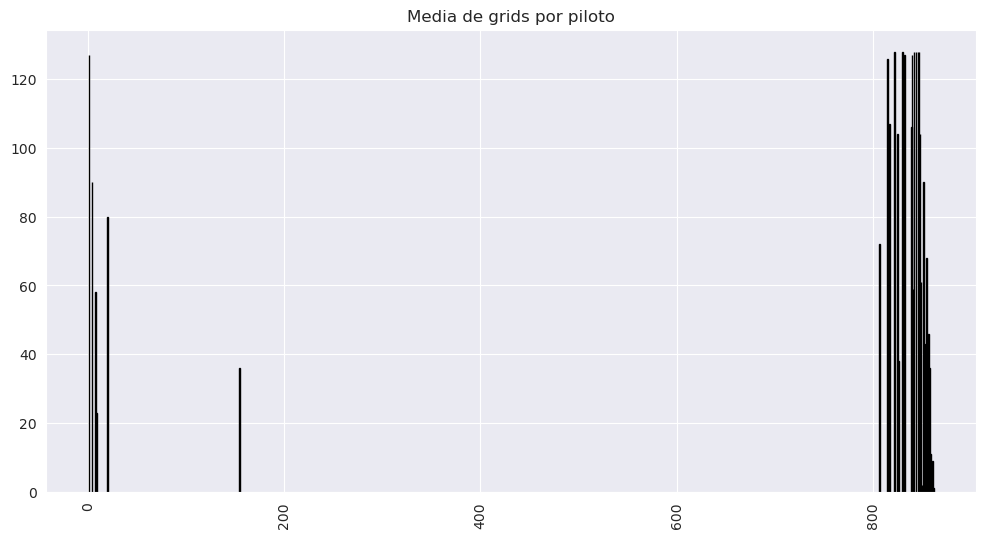

In [38]:


driver_grid = results.groupby("code")["grid"].mean()
driver_grid = results.where(results['grid'] == 1).dropna()

driver_grid_counts = qualifying_2019_2024.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    driver_grid_counts["driverId"],
    driver_grid_counts["count"],
    color="navy",
    edgecolor="black"
)
plt.title("Media de grids por piloto")
plt.xticks(rotation=90)

Aquel piloto con una media mas baja, ha estado en las posiciones mas altas del grid, es decir aquel que ha obtenido posiciones mas altas, por lo tanto existe una relacion inversa ente la media de la vaiable grid y la pole position.

¿En qué lap se dió la vuelta rápida por circuito y quién la obtuvo?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Aitken'),
  Text(1, 0, 'Albon'),
  Text(2, 0, 'Alonso'),
  Text(3, 0, 'Bearman'),
  Text(4, 0, 'Bottas'),
  Text(5, 0, 'Colapinto'),
  Text(6, 0, 'Doohan'),
  Text(7, 0, 'Fittipaldi'),
  Text(8, 0, 'Gasly'),
  Text(9, 0, 'Giovinazzi'),
  Text(10, 0, 'Grosjean'),
  Text(11, 0, 'Hamilton'),
  Text(12, 0, 'Hülkenberg'),
  Text(13, 0, 'Kubica'),
  Text(14, 0, 'Kvyat'),
  Text(15, 0, 'Latifi'),
  Text(16, 0, 'Lawson'),
  Text(17, 0, 'Leclerc'),
  Text(18, 0, 'Magnussen'),
  Text(19, 0, 'Mazepin'),
  Text(20, 0, 'Norris'),
  Text(21, 0, 'Ocon'),
  Text(22, 0, 'Piastri'),
  Text(23, 0, 'Pérez'),
  Text(24, 0, 'Ricciardo'),
  Text(25, 0, 'Russell'),
  Text(26, 0, 'Räikkönen'),
  Text(27, 0, 'Sainz'),
  Text(28, 0, 'Sargeant'),
  Text(29, 0, 'Schumacher'),
  Text(30, 0, 'Stroll

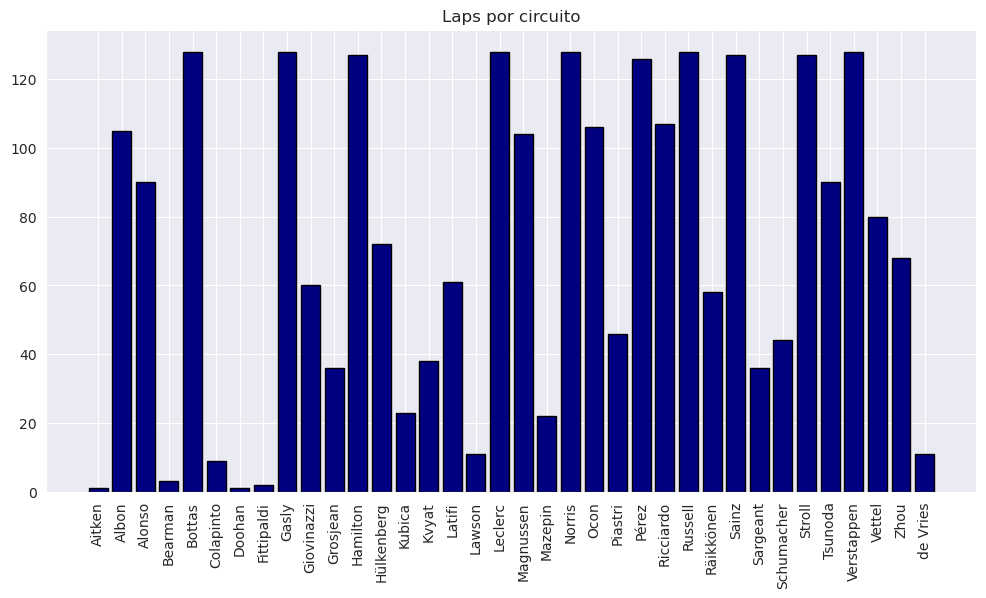

In [39]:
# cambiando nombre a los pilotos para mejor visualizacion

drivers = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/drivers.csv')

names = drivers.set_index('driverId')['surname'].to_dict()

results['driverId'] = results['driverId'].map(names)


idx = results.groupby("circuitId")["fastestLap"].idxmin()
fast_laps = results.loc[idx, ["circuitId", "driverId", "fastestLap"]]
fast_laps

fast_laps_counts = results.groupby('driverId').size().reset_index(name='count')


plt.figure(figsize=(12, 6))
plt.bar(
    fast_laps_counts["driverId"],
    fast_laps_counts["count"],
    color="navy",
    edgecolor="black"
)
plt.title("Laps por circuito")
plt.xticks(rotation=90)

In [32]:
fast_laps

,circuitId,driverId,fastestLap
raceId,,,
1123,1,Sainz,48
1123,1,Leclerc,56
1123,1,Norris,1
1123,1,Piastri,1
1123,1,Pérez,47
...,...,...,...
1142,80,Lawson,45
1142,80,Ocon,47
1142,80,Bottas,46


¿Hay una relación entre velocidad máxima y circuito (altitud)?

¿En que lap es más probable que se haga el primer pit, según el circuito?

¿Hay alguna relación entre el máximo tiempo obtenido en las Qualifications y el de las carreras?
Ejemplo si Pérez obtuvo un tiempo maximo en Q's de 1.48.2, es posible que haya mejoras?

¿Que pilotos han estado mas veces en la Q'3?

In [44]:
pilotos_q3

raceId
1010    80.486
1010    80.598
1010    81.190
1010    81.320
1010    81.442
         ...  
1144       NaN
1144       NaN
1144       NaN
1144       NaN
1144       NaN
Name: q3, Length: 2556, dtype: float64

In [45]:
# Filtrar pilotos que estuvieron en Q3 (posiciones de salida del 1 al 10)
pilotos_q3 = qualifying_2019_2024[qualifying_2019_2024["q3"]]

# Contar cuántas veces ha estado cada piloto en Q3
pilotos_q3 = pilotos_q3["driverId"].value_counts().reset_index()

pilotos_q3.columns = ["driverId", "veces_en_Q3"]

pilotos_q3

#Grafico
top_pilotos = pilotos_q3.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pilotos["driverId"].astype(str), y=top_pilotos["veces_en_Q3"], palette="mako")

plt.xlabel("Piloto ID")
plt.ylabel("Veces en Q3")
plt.title("Pilotos con más clasificaciones en Q3")
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario

plt.show()

KeyError: "None of [Index([           80.486,            80.598,             81.19,\n                   81.32, 81.44200000000001,            81.826,\n                  82.099,            82.304,            82.314,\n                  82.781,\n       ...\n                     nan,               nan,               nan,\n                     nan,               nan,               nan,\n                     nan,               nan,               nan,\n                     nan],\n      dtype='float64', length=2556)] are in the [columns]"

Q3 es la ronda final de clasificación, donde los 10 pilotos más rápidos compiten por las mejores posiciones en la parrilla de salida. Por lo que estos son el top 10 de pilotos mas agiles en la formula 1, el cual en el periodo 2014-2024 ha estado encabezado por Hamilton, seguido de Verstappen.

Distribución de las Pole positions de 2019 a 2024

KeyError: 'year'

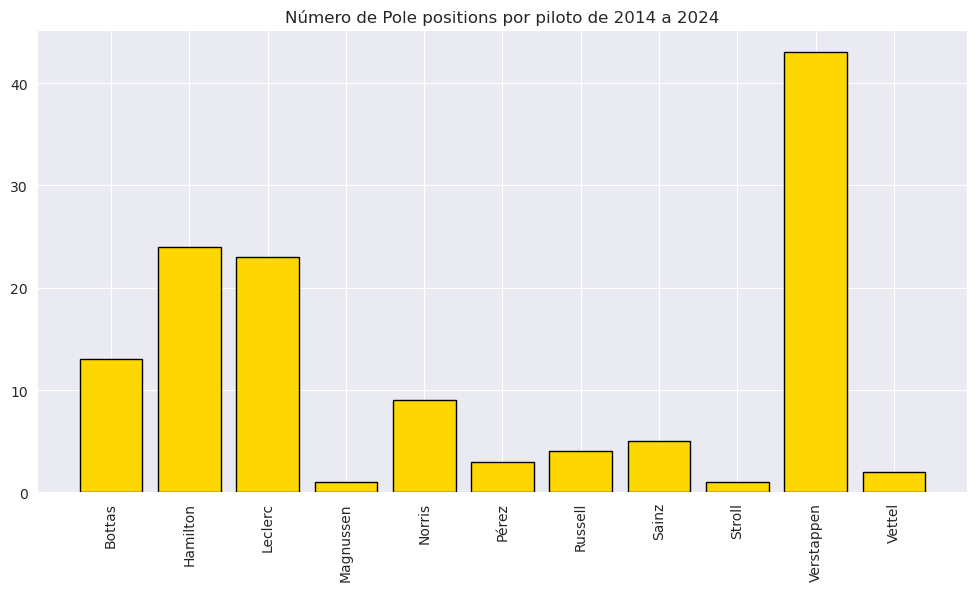

In [46]:
# cambiando nombre a pilotos para mejor visualización

drivers = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/drivers.csv')

names = drivers.set_index('driverId')['surname'].to_dict()

qualifying_2019_2024['driverId'] = qualifying_2019_2024['driverId'].map(names)

# making some plots
# contando las pole positions 2014 a 2024
pole_positions = qualifying_2019_2024.where(qualifying_2019_2024['position'] == 1).dropna()

pole_counts = pole_positions.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    pole_counts["driverId"],
    pole_counts["count"],
    color="gold",
    edgecolor="black"
)
plt.title("Número de Pole positions por piloto de 2014 a 2024")
plt.xticks(rotation=90)


# pole position de 2019 - 2021 y 2022-2024
pole_positions_2019_2021 = qualifying_2019_2024.where((qualifying_2019_2024['position'] == 1) & (qualifying_2019_2024['year'] <= 2021)).dropna()
pole_counts_2019_2021 = pole_positions_2019_2021.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    pole_counts_2019_2021["driverId"],
    pole_counts_2019_2021["count"],
    color="gray",
    edgecolor="black"
)
plt.title("Número de Pole positions por piloto de 2014 - 2021")
plt.xticks(rotation=90)

pole_positions_2022_2024 = qualifying_2019_2024.where((qualifying_2019_2024['position'] == 1) & (qualifying_2019_2024['year'] >2021)).dropna()
pole_counts_2022_2024 = pole_positions_2022_2024.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    pole_counts_2022_2024["driverId"],
    pole_counts_2022_2024["count"],
    color="blue",
    edgecolor="black"
)
plt.title("Número de Pole positions por piloto de 2022 - 2024")
plt.xticks(rotation=90)


Verificar la correlación entre el grid y la posición final

In [49]:
results

,year_x,circuitId,resultId,driverId_x,grid,position_x,positionOrder,points,laps,time,...,fastestLapTime,fastestLapSpeed,statusId,year_y,qualifyId,driverId_y,position_y,q1,q2,q3
raceId,,,,,,,,,,,,,,,,,,,,,
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1:25.580,223.075,1,2019,7960,Hamilton,1,1:22.043,1:21.014,1:20.486
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1:25.580,223.075,1,2019,7961,Bottas,2,1:22.367,1:21.193,1:20.598
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1:25.580,223.075,1,2019,7962,Vettel,3,1:22.885,1:21.912,1:21.190
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1:25.580,223.075,1,2019,7963,Verstappen,4,1:22.876,1:21.678,1:21.320
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1:25.580,223.075,1,2019,7964,Leclerc,5,1:22.017,1:21.739,1:21.442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,2024,24,26764,815,10,\N,20,0.0,0,\N,...,\N,\N,4,2024,10547,Albon,16,1:23.821,\N,\N
1144,2024,24,26764,815,10,\N,20,0.0,0,\N,...,\N,\N,4,2024,10548,Zhou,17,1:23.880,\N,\N
1144,2024,24,26764,815,10,\N,20,0.0,0,\N,...,\N,\N,4,2024,10549,Hamilton,18,1:23.887,\N,\N


In [25]:
results = results.merge(qualifying_2019_2024, on="raceId", how="left")

In [26]:
results

,year,circuitId_x,resultId,driverId_x,grid,position_x,positionOrder,points,laps,time,...,statusId,year_x,circuitId_y,year_y,qualifyId,driverId_y,position_y,q1,q2,q3
raceId,,,,,,,,,,,,,,,,,,,,,
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1,2019,1,2019,7960,1,1,82.043,81.014,80.486
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1,2019,1,2019,7961,822,2,82.367,81.193,80.598
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1,2019,1,2019,7962,20,3,82.885,81.912,81.190
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1,2019,1,2019,7963,830,4,82.876,81.678,81.320
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,...,1,2019,1,2019,7964,844,5,82.017,81.739,81.442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,2024,24,26764,815,10,\N,20,0.0,0,\N,...,4,2024,24,2024,10547,848,16,83.821,NaN,NaN
1144,2024,24,26764,815,10,\N,20,0.0,0,\N,...,4,2024,24,2024,10548,855,17,83.880,NaN,NaN
1144,2024,24,26764,815,10,\N,20,0.0,0,\N,...,4,2024,24,2024,10549,1,18,83.887,NaN,NaN


In [47]:
corr_grid = results['grid'].corr(results['position_x'])

sns.scatterplot(x=results['grid'], y=results['position_x'])
plt.title(f'Grid vs PositionOrder (Corr: {corr_grid:.2f})')
plt.xlabel('Grid')
plt.ylabel('Posición')
plt.figtext(0.5, -0.1, "Correlación débil (0.17) directa con la posición final del piloto.", wrap=True, horizontalalignment='center')
plt.show()

corr_points = results['points'].corr(results['position_x'])

sns.scatterplot(x=results['points'], y=results['position_x'])
plt.title(f'Points vs Position (Corr: {corr_points:.2f})')
plt.xlabel('Points')
plt.ylabel('Position')
plt.figtext(0.5, -0.1, "Correlación moderada (-0.58) inversa con la posición final del piloto.", wrap=True, horizontalalignment='center')
plt.show()


corr_laps = results['laps'].corr(results['position_x'])

sns.scatterplot(x=results['laps'], y=results['position_x'])
plt.title(f'Laps vs Position (Corr: {corr_laps:.2f})')
plt.xlabel('Laps')
plt.ylabel('Position')
plt.figtext(0.5, -0.1, "Correlación moderada (-0.65) inversa con la posición final del piloto.", wrap=True, horizontalalignment='center')
plt.show()


corr_q1 = results['q1_sec'].corr(results['position_x'])

sns.scatterplot(x=results['q1_sec'], y=results['position_x'])
plt.title(f'Q1 Time vs Position (Corr: {corr_q1:.2f})')
plt.xlabel('Q1 Time (sec)')
plt.ylabel('Position Order')
plt.figtext(0.5, -0.1, "Correlación muy débil (0.05) directa con la posición final del piloto.", wrap=True, horizontalalignment='center')
plt.show()


KeyError: 'position_x'

## Analisis de componentes principales

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Análisis de Componentes Principales (PCA) ---

# Seleccionar las variables numéricas para el PCA
numerical_vars = ['year','circuitId', 'resultId', 'driverId','grid','positionOrder','points', 'laps']

pca_data = results[numerical_vars].dropna()  # Eliminar filas con valores faltantes

# Estandarizar las variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df

ValueError: could not convert string to float: 'Bottas'

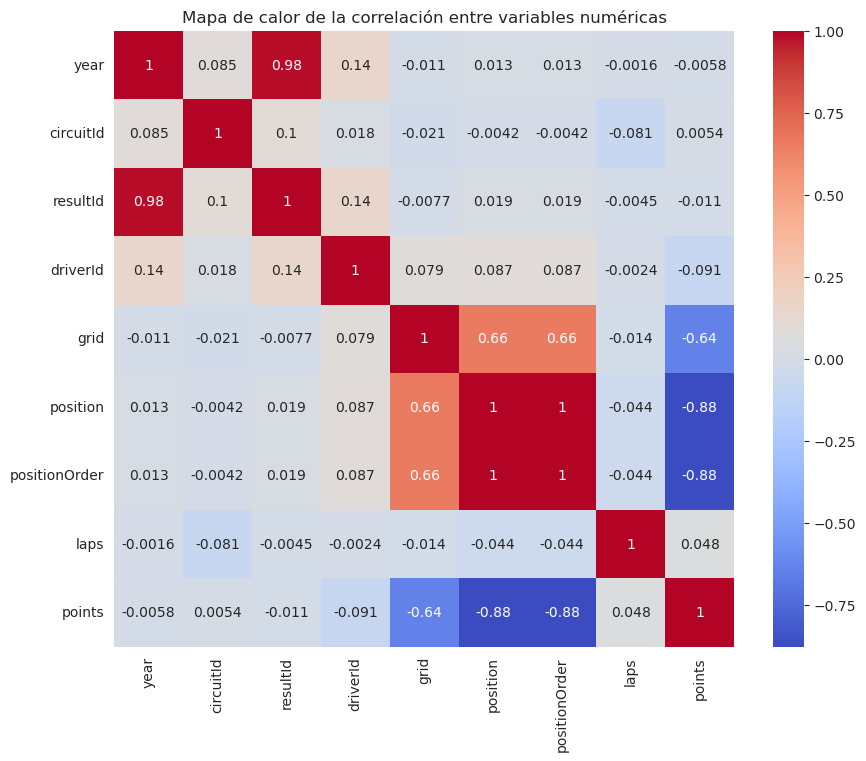

In [39]:
# Mapa de calor de la correlación entre variables numéricas
numerical_vars = ['year','circuitId', 'resultId', 'driverId','grid','position','positionOrder', 'laps', 'points']
for col in numerical_vars:
    results[col] = pd.to_numeric(results[col], errors='coerce')
results = results.dropna(subset=numerical_vars)

correlation_matrix = results[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()